In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

import collections
import matplotlib.pyplot as plt
import numpy as np

import os

#import pandas
#from sklearn.preprocessing import MinMaxScaler
#from sklearn.metrics import mean_squared_error



import tensorflow as tf

from tensorflow.keras import layers

In [2]:
caracteres={'0':0,'1':1,'2':2,'3':3,'4':4,'5':5,'6':6,'7':7,'8':8,'9':9}

In [56]:
VOCABULARIO=len(caracteres)
LONGITUD=6
FICHERO_PESOS="modelos/pesosRNN2.hdf5"

In [51]:
iniciar=True

#Indicamos un valor de semilla para el generador de números aleatorios
np.random.seed(7)
#dataset = pandas.read_csv('entrenamiento1.csv', engine='python')
dataset=np.array(range(10000))
#print(dataset)
#datos=[]
entrenamiento=[]
salida=[]

textoEntrada=[];

for i in range(len(dataset)):
    textoEntrada+=(caracteres[c] for c in list(format(dataset[i], "0"+str(LONGITUD))))
#print (textoEntrada)
for i in range(len(textoEntrada)-LONGITUD):
    entrenamiento.append(textoEntrada[i:i+LONGITUD])
    salida.append(textoEntrada[i+LONGITUD])
#print(datos)
#print(entrenamiento)
#print(salida)

entrenamiento = np.array(entrenamiento)
#print(entrenamiento.shape)
entrenamiento = np.reshape(entrenamiento, (entrenamiento.shape[0], entrenamiento.shape[1], 1))
entrenamiento = entrenamiento/float(VOCABULARIO)

salida = np.array(salida)
salida = tf.keras.utils.to_categorical(salida)
print(entrenamiento.shape)
print(salida.shape)

#dataset=dataset.values
#dataset=dataset.astype('float32')

##normalizamos los datos. Normalizar es poner entre [0,1]
#escaler = MinMaxScaler(feature_range=(0, 1))
#datos = escaler.fit_transform(datos)
#datos=np.array(datos)
#datos=datos/float(10)
#print(datos)

##Separamos los datos 
#tamañoEntranamiento = int(len(dataset) * 0.67)
#entrenamiento, test = dataset[0:tamañoEntranamiento,:], dataset[tamañoEntranamiento:len(dataset),:]
#print(entrenamiento, test)
#print(len(entrenamiento),len(test),len(dataset))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[[0], [1], [2], [3], [4], [5], [6], [7], [8]]
[1, 2, 3, 4, 5, 6, 7, 8, 9]
(9, 1, 1)
(9, 10)
[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


In [5]:
def construirModelo(vocabulario=VOCABULARIO, longitud=LONGITUD):
    model = tf.keras.Sequential()
    model.add(layers.LSTM(256, input_shape = (longitud, 1), return_sequences = True))
    model.add(layers.Dropout(0.2))
    model.add(layers.LSTM(256))
    model.add(layers.Dropout(0.2))
    model.add(layers.Dense(vocabulario, activation = 'softmax'))
    model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics=['accuracy'])
    
    return model



In [58]:
model = construirModelo(VOCABULARIO,1)
if(os.path.isfile(FICHERO_PESOS) and not iniciar):
    model.load_weights(FICHERO_PESOS)
iniciar=False

checkpoint = tf.keras.callbacks.ModelCheckpoint(FICHERO_PESOS, monitor='loss', verbose=1, save_best_only=True, mode='min')
callbacks_list = [checkpoint]

history = model.fit(entrenamiento, salida, validation_split=0.05, epochs = 100, batch_size = 128, callbacks = callbacks_list, shuffle=True).history



Train on 8 samples, validate on 1 samples
Epoch 1/100

Epoch 00001: loss improved from inf to 1.48379, saving model to modelos/pesosRNN2.hdf5
8/8 [==============================] - 4s 461ms/sample - loss: 1.4838 - accuracy: 0.5000 - val_loss: 9.0421 - val_accuracy: 0.0000e+00
Epoch 2/100

Epoch 00002: loss did not improve from 1.48379
8/8 [==============================] - 0s 3ms/sample - loss: 1.4983 - accuracy: 0.5000 - val_loss: 9.1767 - val_accuracy: 0.0000e+00
Epoch 3/100

Epoch 00003: loss improved from 1.48379 to 1.45002, saving model to modelos/pesosRNN2.hdf5
8/8 [==============================] - 0s 24ms/sample - loss: 1.4500 - accuracy: 0.5000 - val_loss: 9.3186 - val_accuracy: 0.0000e+00
Epoch 4/100

Epoch 00004: loss did not improve from 1.45002
8/8 [==============================] - 0s 3ms/sample - loss: 1.4974 - accuracy: 0.3750 - val_loss: 9.4640 - val_accuracy: 0.0000e+00
Epoch 5/100

Epoch 00005: loss did not improve from 1.45002
8/8 [==============================] - 

8/8 [==============================] - 0s 22ms/sample - loss: 1.1586 - accuracy: 0.8750 - val_loss: 14.4613 - val_accuracy: 0.0000e+00
Epoch 40/100

Epoch 00040: loss did not improve from 1.15856
8/8 [==============================] - 0s 3ms/sample - loss: 1.1936 - accuracy: 0.7500 - val_loss: 14.6024 - val_accuracy: 0.0000e+00
Epoch 41/100

Epoch 00041: loss did not improve from 1.15856
8/8 [==============================] - 0s 3ms/sample - loss: 1.1731 - accuracy: 0.7500 - val_loss: 14.7455 - val_accuracy: 0.0000e+00
Epoch 42/100

Epoch 00042: loss improved from 1.15856 to 1.13177, saving model to modelos/pesosRNN2.hdf5
8/8 [==============================] - 0s 27ms/sample - loss: 1.1318 - accuracy: 0.6250 - val_loss: 14.8917 - val_accuracy: 0.0000e+00
Epoch 43/100

Epoch 00043: loss did not improve from 1.13177
8/8 [==============================] - 0s 3ms/sample - loss: 1.2050 - accuracy: 0.7500 - val_loss: 15.0330 - val_accuracy: 0.0000e+00
Epoch 44/100

Epoch 00044: loss did not 

8/8 [==============================] - 0s 29ms/sample - loss: 0.8563 - accuracy: 1.0000 - val_loss: 20.0005 - val_accuracy: 0.0000e+00
Epoch 79/100

Epoch 00079: loss did not improve from 0.85625
8/8 [==============================] - 0s 3ms/sample - loss: 0.9259 - accuracy: 1.0000 - val_loss: 20.1172 - val_accuracy: 0.0000e+00
Epoch 80/100

Epoch 00080: loss did not improve from 0.85625
8/8 [==============================] - 0s 3ms/sample - loss: 0.9491 - accuracy: 0.8750 - val_loss: 20.2281 - val_accuracy: 0.0000e+00
Epoch 81/100

Epoch 00081: loss did not improve from 0.85625
8/8 [==============================] - 0s 3ms/sample - loss: 0.8774 - accuracy: 0.7500 - val_loss: 20.3306 - val_accuracy: 0.0000e+00
Epoch 82/100

Epoch 00082: loss did not improve from 0.85625
8/8 [==============================] - 0s 3ms/sample - loss: 0.8959 - accuracy: 0.8750 - val_loss: 20.4214 - val_accuracy: 0.0000e+00
Epoch 83/100

Epoch 00083: loss did not improve from 0.85625
8/8 [===================

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_24 (LSTM)               (None, 1, 256)            264192    
_________________________________________________________________
dropout_24 (Dropout)         (None, 1, 256)            0         
_________________________________________________________________
lstm_25 (LSTM)               (None, 256)               525312    
_________________________________________________________________
dropout_25 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 10)                2570      
Total params: 792,074
Trainable params: 792,074
Non-trainable params: 0
_________________________________________________________________
None


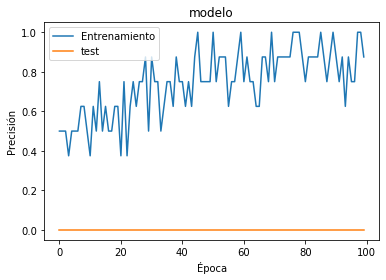

In [59]:
import matplotlib.pyplot as plt
%matplotlib inline
#import seaborn as sns
#from pylab import rcParams
#sns.set(style='whitegrid', palette='muted', font_scale=1.5)
#rcPatams['figure.figsize']=12, 5
print(model.summary())
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.title('modelo')
plt.ylabel('Precisión')
plt.xlabel('Época')
plt.legend(['Entrenamiento', 'test'],loc='upper left')

In [18]:
model = construirModelo(VOCABULARIO)
model.load_weights(FICHERO_PESOS)
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam')



In [36]:
import ipywidgets as widgets
#from IPython.display import clear_output
textoOriginal = []
prediccion = []
def submit(datos):
    global textoOriginal
    global prediccion
    
    listaTextoCompleto = list(text.value)
    if(len(listaTextoCompleto)<LONGITUD):
        listaCaracteresSinProcesar = ['0' for i in range(LONGITUD-len(listaTextoCompleto))]+listaTextoCompleto[:len(listaTextoCompleto)]
    else:
        indice=len(listaTextoCompleto)-LONGITUD
        listaCaracteresSinProcesar = listaTextoCompleto[indice:indice+LONGITUD]
    
    textoProcesado = listaTextoCompleto[:len(textoOriginal)]    
    textoCompleto = text.value    
    #palabraSinProcesar.append(' ')
    
    textoAnterior = [caracteres[c] for c in textoProcesado]
    ultimoTexto = [caracteres[c] for c in listaCaracteresSinProcesar]
    
    #Alimentamos la red con toda la entrada anterior
    #TODO
    
    
    numero=[]
    for i in range(LONGITUD):
        #X=np.array([ultimoTexto])
        X = np.reshape(ultimoTexto, (1, LONGITUD, 1))
        siguienteNumero = model.predict((X/float(VOCABULARIO)))
        #print(siguienteNumero)
        siguienteNumero=np.argmax(siguienteNumero)
        ultimoTexto.append(siguienteNumero)
        ultimoTexto = ultimoTexto[1:]
        numero.append(str(siguienteNumero))
        
    #
    pronostico.clear_output()
    with pronostico:
        print( ''.join(numero))
    
    #display(text)
    #text.focus_set()

In [60]:
pronostico=widgets.Output()

text = widgets.Text(continuous_update=True)
text.value="000006"
display(text,pronostico)
submit([])
text.on_submit(submit)
text.observe(submit)


Text(value='000006')

Output()